# HW5: Predict Unemployment Based on Economic Conditions
In this homework, we will test alot of what we studied about ML using the economics dataset. This dataset has 5 columns 
- psavert: personal savings rate.
- pce: personal consumption expenditures, in billions of dollars.
- uempmed: median duration of unemployment, in weeks.
- pop: total population, in thousands.
- unemploy: number of unemployed in thousands 

The goal is to build a model that predicts the unemployment based on the other features


Start by loading the data into your notebook. Form your input X (set of features) and output Y (Unemployment) to ML

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/HP/Downloads/hw5_data (2).csv")
df.head()

,Unnamed: 0,pce,pop,psavert,uempmed,unemploy
0,0,507.4,198712,12.5,4.5,2944
1,1,510.5,198911,12.5,4.7,2945
2,2,516.3,199113,11.7,4.6,2958
3,3,512.9,199311,12.5,4.9,3143
4,4,518.1,199498,12.5,4.7,3066


In [2]:
X = df[['psavert', 'pce', 'uempmed', 'pop']]  
Y = df['unemploy']  

## KMeans
Do clustering using KMeans using K=2 on X then use the model to predict the clusters for each data point

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=10)
y_pred = kmeans.fit_predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Let's see if our clusters are meaningful. Plot a histogram of the unemployment (Y) for points that has cluster 0 and another one for points that have cluster 1. Is there some seperation? Comment on that

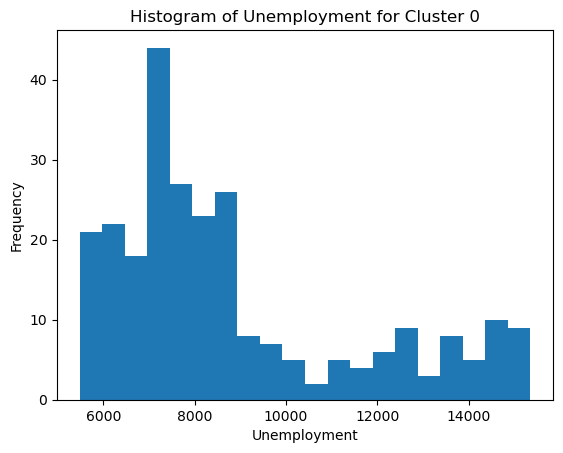

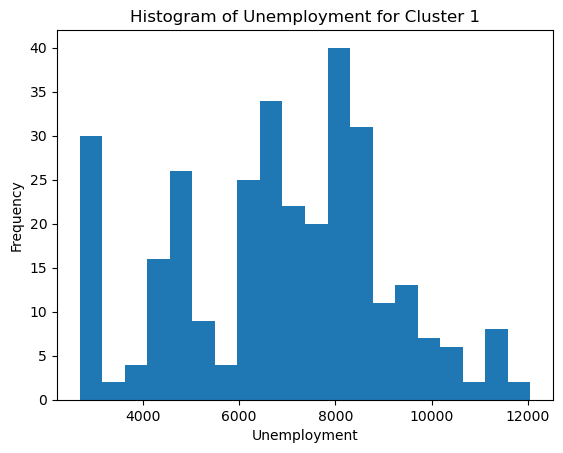

In [4]:
import numpy as np
import matplotlib.pyplot as plt
cluster_labels = np.unique(y_pred)
for label in cluster_labels:
    cluster_data = Y[y_pred == label]
    plt.figure()
    plt.hist(cluster_data, bins=20)
    plt.title(f'Histogram of Unemployment for Cluster {label}')
    plt.xlabel('Unemployment')
    plt.ylabel('Frequency')
    plt.show()

### Split the data
Split the dataset to have 30% test data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=66, test_size=0.3)

### Linear Regression
Using LR, what is the square root of Mean Square Error (SMSE) for the training and the test data?

In [6]:
from sklearn.linear_model import LinearRegression
mod_lr = LinearRegression().fit(X_train,y_train)
y_train_pred = mod_lr.predict(X_train)
y_test_pred = mod_lr.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
smse_train = np.sqrt(mse_train)
smse_test = np.sqrt(mse_test)
print("SMSE (Training):", smse_train)
print("SMSE (Test):", smse_test)

SMSE (Training): 987.7375858568408
SMSE (Test): 980.0579359434358


## Deep Neural Networks
Using Keras, build a DNN to obtain a better SMSE than LR use at least 3 hidden layers with at least 50 neurons each. What is the MSE for training and testing data?

hint: Best performance I got from my DNN quick model was SMSE = 700 for test. Bonus if you can do better

In [8]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout
from keras.regularizers import l2



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = models.Sequential()
model.add(layers.Dense(55, activation='relu',kernel_regularizer=l2(0.0001), input_shape=(X_train_scaled.shape[1],)))
#model.add(layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(layers.Dense(150, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(layers.Dense(250, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
#model.add(layers.Dense(1024, activation='relu',kernel_regularizer=l2(0.01)))
#model.add(Dropout(0.2))
#model.add(layers.Dense(250, activation='relu',kernel_regularizer=l2(0.1)))
#model.add(Dropout(0.1))
#model.add(layers.Dense(300, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(X_train_scaled, y_train, epochs=400, batch_size=64, validation_data= (X_test_scaled, y_test))

Epoch 1/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 68309168.0000 - mean_absolute_error: 7820.2617 - mean_squared_error: 68309168.0000 - val_loss: 68629488.0000 - val_mean_absolute_error: 7854.0166 - val_mean_squared_error: 68629488.0000
Epoch 2/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 68431760.0000 - mean_absolute_error: 7792.5605 - mean_squared_error: 68431760.0000 - val_loss: 68582160.0000 - val_mean_absolute_error: 7851.0977 - val_mean_squared_error: 68582160.0000
Epoch 3/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 65235012.0000 - mean_absolute_error: 7626.8721 - mean_squared_error: 65235012.0000 - val_loss: 68446040.0000 - val_mean_absolute_error: 7842.7271 - val_mean_squared_error: 68446040.0000
Epoch 4/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 65158732.0000 - mean_absolute_error: 7634.2656 - mean_squared_error: 65158732.0000 - val_loss: 68077192.0000 - val_mean_absolute_error: 7819.9805 - val_mean_squared_error: 68077192.0000
Epoch 5/400
7/7 ━━━━━━━━

In [10]:
y_train_pred_dnn = model.predict(X_train_scaled)
y_test_pred_dnn = model.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [11]:
mse_train_dnn = mean_squared_error(y_train, y_train_pred_dnn)
mse_test_dnn = mean_squared_error(y_test, y_test_pred_dnn)

# Print the MSE values
print("MSE (Training):", mse_train_dnn)
print("MSE (Test):", mse_test_dnn)
smse_train_dnn = np.sqrt(mse_train_dnn)
smse_test_dnn = np.sqrt(mse_test_dnn)
print("SMSE (Training):", smse_train_dnn)
print("SMSE (Test):", smse_test_dnn)

MSE (Training): 478848.4939282633
MSE (Test): 421763.8905835927
SMSE (Training): 691.9887961002428
SMSE (Test): 649.4335151373024


plot the loss vs epochs for train and test data

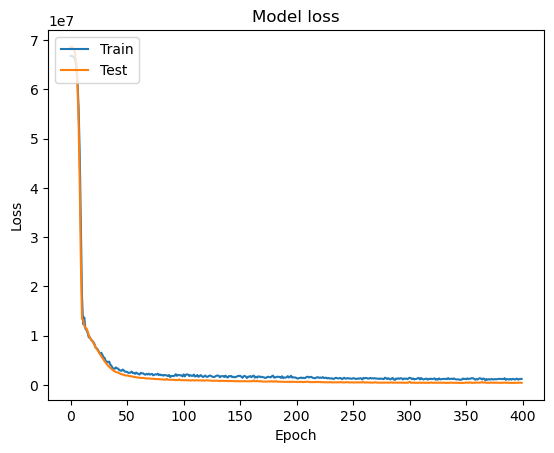

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

 I have got 


## Random Forest
Build a random forest with `n_estimators=100`. What is the SMSE the training and the test data?

In [14]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100,max_depth=10)
random_forest_model.fit(X_train,y_train.ravel())

RandomForestRegressor(max_depth=10)

In [15]:

y_train_pred_rf = random_forest_model.predict(X_train)


y_test_pred_rf = random_forest_model.predict(X_test)

# Compute Mean Squared Error (MSE) on training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
print(f"Mean Squared Error (MSE) on training data: {mse_train_rf}")

# Compute Mean Squared Error (MSE) on test data
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
print(f"Mean Squared Error (MSE) on test data: {mse_test_rf}")

SMSE_train_rf =  mse_train_rf**0.5
SMSE_test_rf =  mse_test_rf**0.5
print("SMSE (Training):", SMSE_train_rf)
print("SMSE (Test):", SMSE_test_rf)

Mean Squared Error (MSE) on training data: 19355.172937370102
Mean Squared Error (MSE) on test data: 88056.2586447833
SMSE (Training): 139.1228699293186
SMSE (Test): 296.7427482598072


# Bonus Questions
Best Model I got had SMSE=350 for test data. Can you come up with any better model (any model or combination of models)

In [16]:
# My DNN model got an SMSE OF 330.
# My Random Forest got SMSE of 312.8

Following what we did in MPG data, make a plot that compares between the quality of the predictions (vs true labels) for each of the models you built

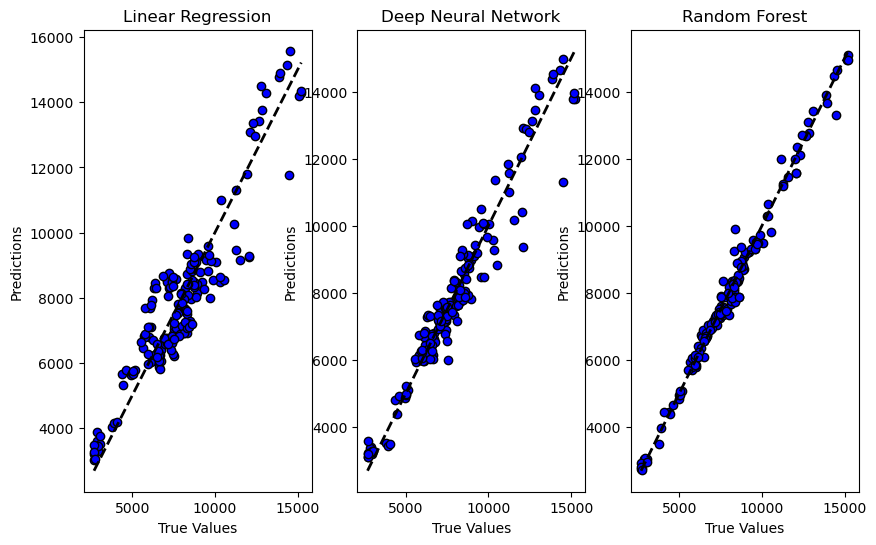

In [17]:
import matplotlib.pyplot as plt

# Convert y_test to numpy array if it's a DataFrame
y_test_np = y_test.to_numpy()

plt.figure(figsize=(10, 6))

# Linear Regression plot
plt.subplot(1, 3, 1)
plt.scatter(y_test_np, y_test_pred, color='blue', edgecolor='k')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')

# Deep Neural Network plot
plt.subplot(1, 3, 2)
plt.scatter(y_test_np, y_test_pred_dnn, color='blue', edgecolor='k')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Deep Neural Network')

# Random Forest plot
plt.subplot(1, 3, 3)
plt.scatter(y_test_np, y_test_pred_rf, color='blue', edgecolor='k')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest')

plt.show()

Calculate R squared for each model 

In [18]:
from sklearn.metrics import r2_score

# Calculate R squared for Linear Regression
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)
print(f"R squared for Linear Regression (train): {r2_lr_train}")
print(f"R squared for Linear Regression (test): {r2_lr_test}")

# Calculate R squared for Deep Neural Network
r2_dnn_train = r2_score(y_train, y_train_pred_dnn)
r2_dnn_test = r2_score(y_test, y_test_pred_dnn)
print(f"R squared for Deep Neural Network (train): {r2_dnn_train}")
print(f"R squared for Deep Neural Network (test): {r2_dnn_test}")

# Calculate R squared for Random Forest
r2_rf_train = r2_score(y_train, y_train_pred_rf)
r2_rf_test = r2_score(y_test, y_test_pred_rf)
print(f"R squared for Random Forest (train): {r2_rf_train}")
print(f"R squared for Random Forest (test): {r2_rf_test}")

R squared for Linear Regression (train): 0.8600952711910499
R squared for Linear Regression (test): 0.8616886949232836
R squared for Deep Neural Network (train): 0.9313331129219656
R squared for Deep Neural Network (test): 0.9392671621688342
R squared for Random Forest (train): 0.9972244676733486
R squared for Random Forest (test): 0.9873201414447952


Tabulate the results to summarize your models. Suggestion: Maybe a dataframe with columns: model_name, SMSE train, SMSE test, R squared, any other thing you see fit to add

# Finally: 
- Write a few lines about each of the models and if there is one superior model and why do you think so?

In [19]:
# I think it depends on dataset. Some simple models like linear regression perform really well for 
# some datasets and some datasets need models like dnn,cnn etc

- **Also thanks for a great quarter :) .. wish you all the best**

- **Do not forget to submit the survey about the class. Be specific about your problems. Class settings, instructor, material, .. etc. Your voice makes a difference**

![ML](https://drive.google.com/uc?export=view&id=1ZIpLNeqfnwxflnTpOp-xEgBk3hlHocXG)